# Data Modelling 

In [2]:
import pandas as pd

df = pd.read_csv("tmdb_5000_movies.csv")
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
from sklearn.model_selection import train_test_split

X = df[['budget', 'popularity', 'vote_average']]  # Example features
y = df['revenue']  # Example target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("-" * 50)


Model: Linear Regression
R2 Score: 0.6757161376672581
MAE: 52123865.6401308
MSE: 8446318057397270.0
RMSE: 91903852.24460001
--------------------------------------------------
Model: Random Forest
R2 Score: 0.7200969557952439
MAE: 46126651.97526535
MSE: 7290372452025644.0
RMSE: 85383677.90172571
--------------------------------------------------
Model: Gradient Boosting
R2 Score: 0.7426303439047692
MAE: 42990758.27477104
MSE: 6703466395354417.0
RMSE: 81874699.36039104
--------------------------------------------------
Model: SVM
R2 Score: -0.1643407302300206
MAE: 82349534.5419861
MSE: 3.0326492548722804e+16
RMSE: 174145033.0865707
--------------------------------------------------
Model: KNN
R2 Score: 0.6485681943796344
MAE: 49687006.48907388
MSE: 9153415111077274.0
RMSE: 95673481.75475414
--------------------------------------------------
Model: Decision Tree
R2 Score: 0.3803851923353204
MAE: 61628638.70551509
MSE: 1.6138526601237272e+16
RMSE: 127037500.76743981
-----------------------

### Conclusion:

- **Best Models:**
  - **Gradient Boosting:** R2 = 0.7426, MAE = 42.99M, MSE = 6.7e+15, RMSE = 81.87M  
  - **Random Forest:** R2 = 0.7201, MAE = 46.13M, MSE = 7.29e+15, RMSE = 85.38M  
  - Both models performed well with high R2 and low error metrics.

- **Worst Models:**
  - **SVM:** R2 = -0.1643, MAE = 82.35M, MSE = 3.03e+16, RMSE = 174.15M  
  - **Decision Tree:** R2 = 0.3804, MAE = 61.63M, MSE = 1.61e+16, RMSE = 127.04M  
  - SVM performed poorly with a negative R2 score, while Decision Tree underperformed in regression tasks.

- **Overall Recommendation:**  
  - **Gradient Boosting** is the best model for predicting movie revenue, followed by **Random Forest**. Avoid **SVM** and **Decision Tree** for this task.


In [6]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


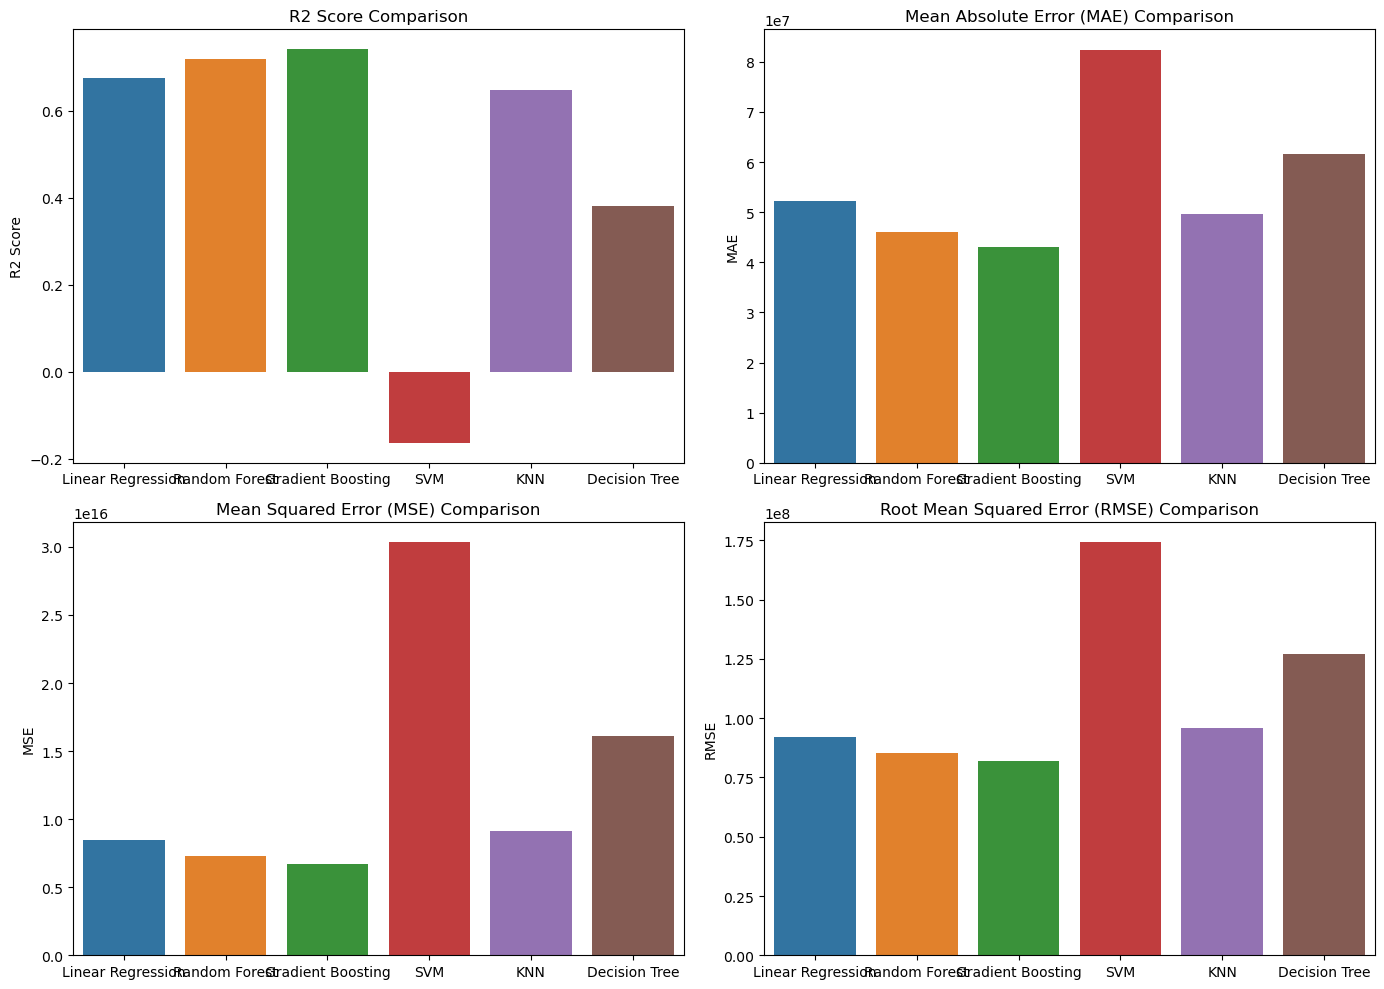

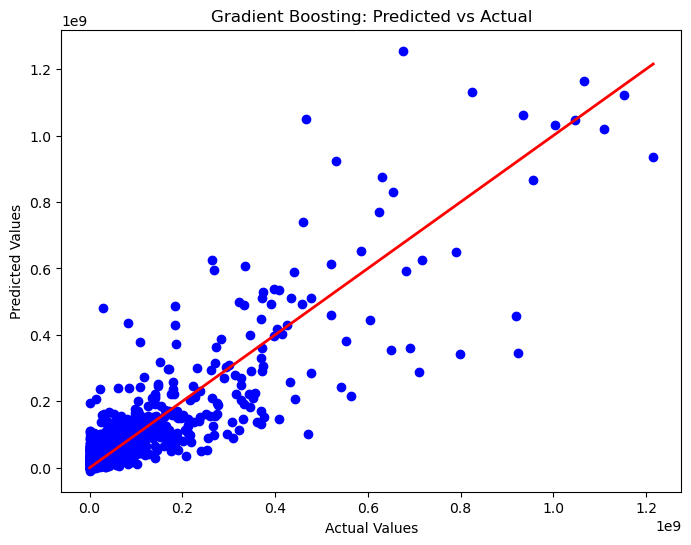

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Store the actual and predicted values for all models
model_names = ["Linear Regression", "Random Forest", "Gradient Boosting", "SVM", "KNN", "Decision Tree"]
r2_scores = [0.6757, 0.7201, 0.7426, -0.1643, 0.6486, 0.3804]
mae_values = [52123865.6401308, 46126651.97526535, 42990758.27477104, 82349534.5419861, 49687006.48907388, 61628638.70551509]
mse_values = [8446318057397270.0, 7290372452025644.0, 6703466395354417.0, 3.0326492548722804e+16, 9153415111077274.0, 1.6138526601237272e+16]
rmse_values = [91903852.24460001, 85383677.90172571, 81874699.36039104, 174145033.0865707, 95673481.75475414, 127037500.76743981]

# Bar plot for R2, MAE, MSE, and RMSE
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# R2 Score
sns.barplot(x=model_names, y=r2_scores, ax=axes[0, 0])
axes[0, 0].set_title('R2 Score Comparison')
axes[0, 0].set_ylabel('R2 Score')

# MAE
sns.barplot(x=model_names, y=mae_values, ax=axes[0, 1])
axes[0, 1].set_title('Mean Absolute Error (MAE) Comparison')
axes[0, 1].set_ylabel('MAE')

# MSE
sns.barplot(x=model_names, y=mse_values, ax=axes[1, 0])
axes[1, 0].set_title('Mean Squared Error (MSE) Comparison')
axes[1, 0].set_ylabel('MSE')

# RMSE
sns.barplot(x=model_names, y=rmse_values, ax=axes[1, 1])
axes[1, 1].set_title('Root Mean Squared Error (RMSE) Comparison')
axes[1, 1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

# Predicted vs Actual Plot for Gradient Boosting (example)
from sklearn.metrics import mean_squared_error

# Example: Predicted vs Actual for Gradient Boosting
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Gradient Boosting: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
